<a href="https://colab.research.google.com/github/debashisdotchatterjee/CV_2024_Postdoc_1/blob/main/Desirability_Draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Original Dataset Head:
    Observation     Y_ALL   Y1        Y2      Y3     Y4      Y5   Y6     X1  \
1            1  5.680000  1.0  1.000000  1.0000  0.680  1.0000  1.0  31.56   
2            2  5.545000  1.0  1.000000  1.0000  0.545  1.0000  1.0  44.43   
3            3  5.680000  1.0  1.000000  1.0000  0.680  1.0000  1.0  31.56   
4            5  3.589000  1.0  1.000000  0.0535  0.000  0.5355  1.0   0.00   
5            8  5.833333  1.0  0.833333  1.0000  1.000  1.0000  1.0  32.58   

     X2  ...  X25  X26      X27     X28       X29    X30    X31    X32  \
1  0.94  ...    1    0  259.328  69.879  3.016646  583.1  138.2  444.9   
2  0.86  ...    1    0  237.024  62.239  3.630737  440.0  132.3  307.8   
3  0.94  ...    1    0  259.328  69.879  3.016646  583.1  138.2  444.9   
4  1.17  ...    1    0  242.633  25.124  2.811808  471.7   22.0  449.6   
5  0.54  ...    1    0  184.551  58.448  4.163898  454.5   78.8  375.7   

        X33   X34  
1  0.001510  4.77  
2  0.001020  2.42  
3 

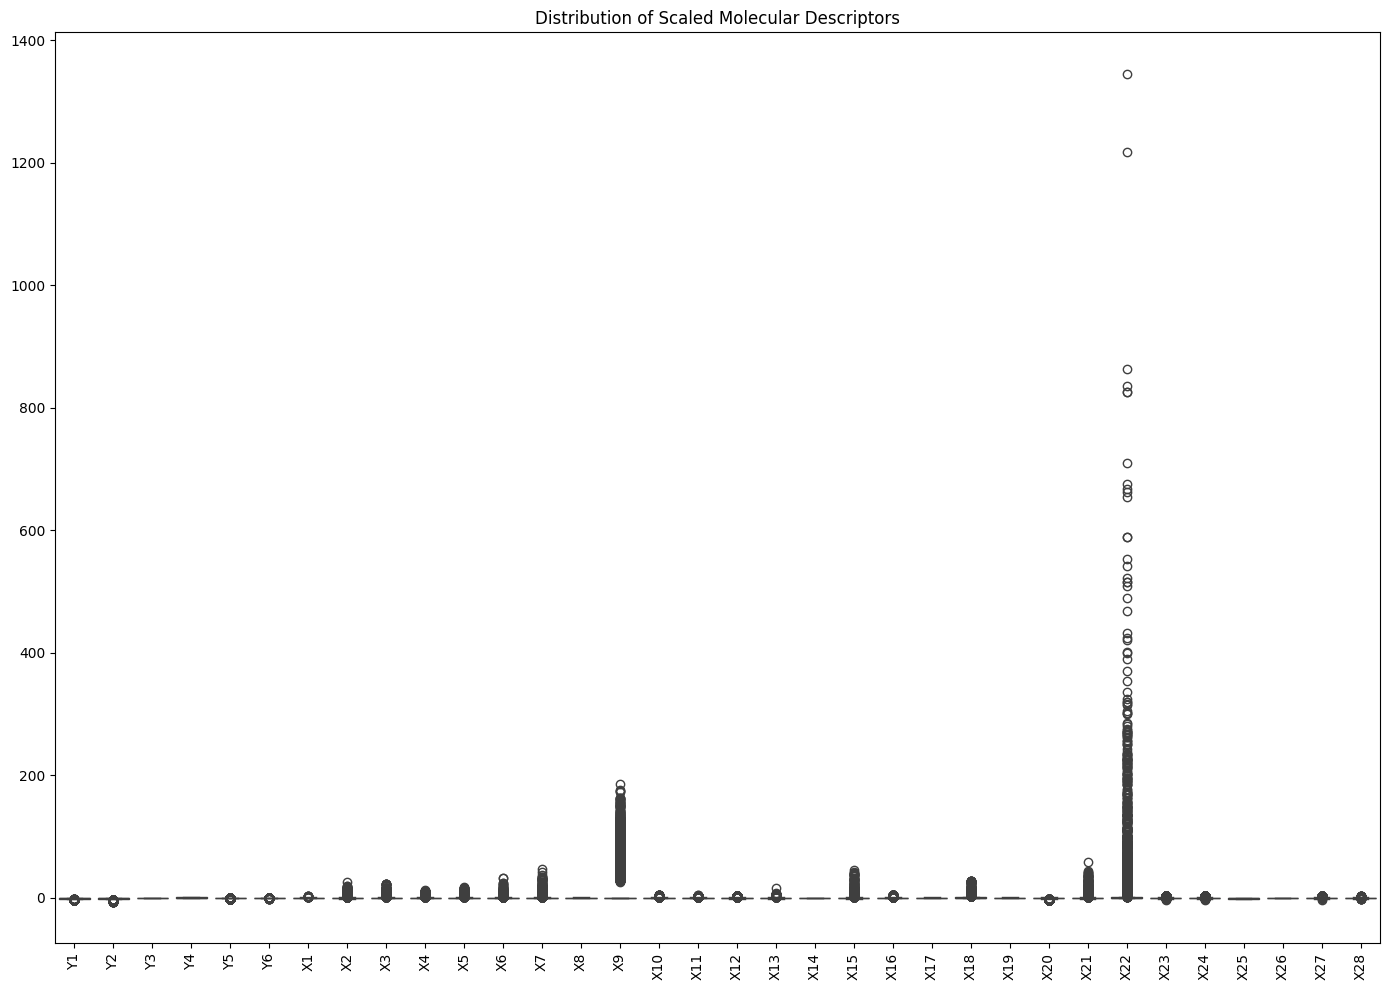

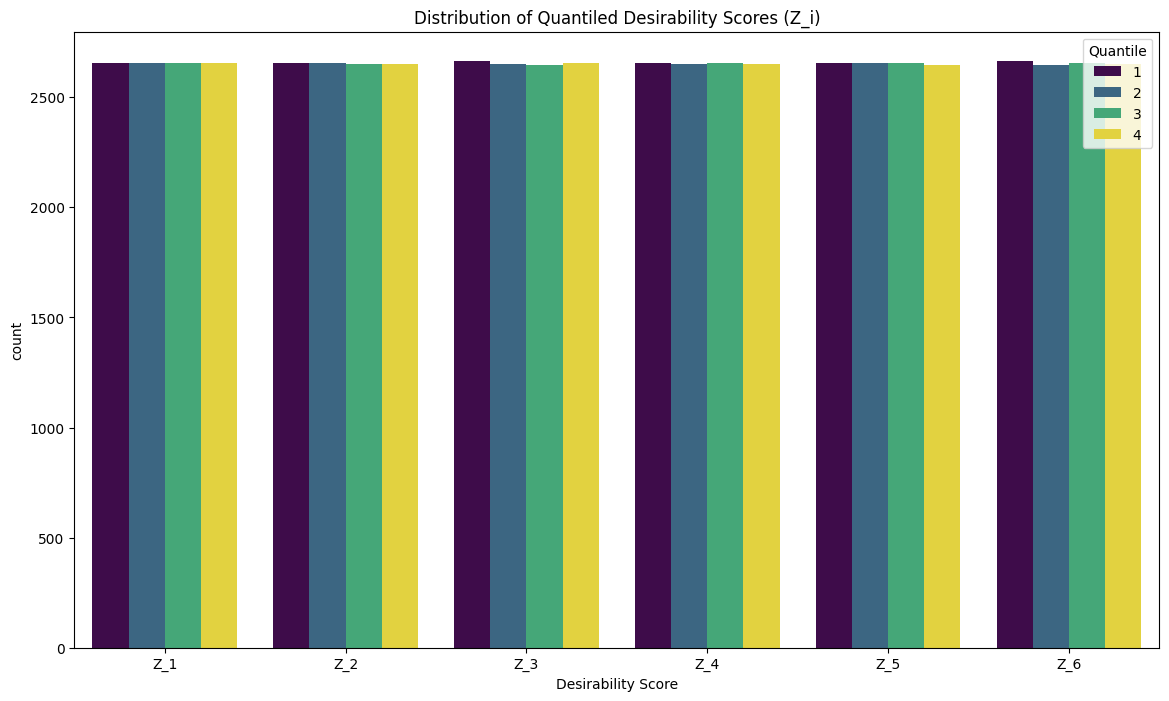

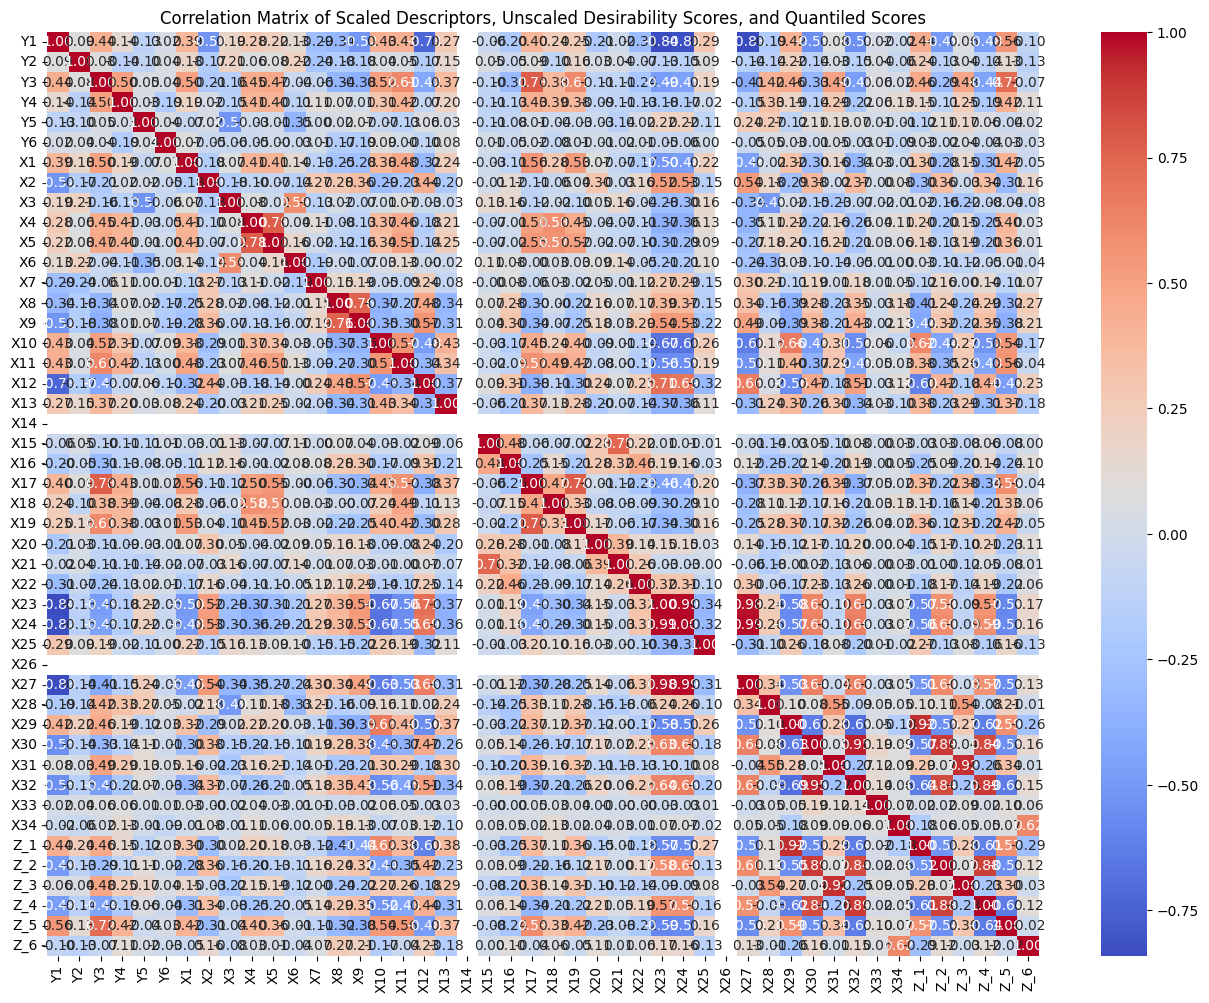

Processing complete. The processed dataset has been saved as 'processed_data.csv'.


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset, specifying the tab delimiter
df = pd.read_csv('dataProject.txt', delimiter='\t')

# Display the first few rows to check if the data is parsed correctly
print("Original Dataset Head:\n", df.head())

# Assuming the first 34 columns are X_i and the next 6 columns are Y_i
X = df.iloc[:, 2:36]  # The molecular descriptors (ignoring the first two columns)
Y = df.iloc[:, 36:42]  # The desirability scores, which we will leave unscaled

# Convert columns to numeric, coercing errors (e.g., handle potential parsing issues)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values resulting from the conversion
X = X.dropna()

# Scaling the X_i using RobustScaler to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to a DataFrame for better handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Create quantiled Y_i as Z_i using quantiles
Z = pd.DataFrame()
for i in range(Y.shape[1]):
    Z[f'Z_{i+1}'] = pd.qcut(Y.iloc[:, i], q=4, labels=False, duplicates='drop') + 1

# Combine the scaled X, unscaled Y_i, and Z_i into a single DataFrame
processed_data = pd.concat([X_scaled_df, Y, Z], axis=1)

# Display the first few rows of the processed data
print("Processed Data Head:\n", processed_data.head())

# Plotting the distribution of the scaled descriptors
plt.figure(figsize=(14, 10))
sns.boxplot(data=X_scaled_df)
plt.title('Distribution of Scaled Molecular Descriptors')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the distribution of the quantiled desirability scores (Z_i)
plt.figure(figsize=(14, 8))
Z_melted = Z.melt(var_name='Desirability Score', value_name='Quantile')
sns.countplot(data=Z_melted, x='Desirability Score', hue='Quantile', palette='viridis')
plt.title('Distribution of Quantiled Desirability Scores (Z_i)')
plt.show()

# Correlation matrix of X_scaled and Z
corr_matrix = processed_data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Descriptors, Unscaled Desirability Scores, and Quantiled Scores')
plt.show()

# Save the processed data to a new CSV file (if needed)
processed_data.to_csv('processed_data.csv', index=False)

print("Processing complete. The processed dataset has been saved as 'processed_data.csv'.")


Original Dataset Head:
    Observation     Y_ALL   Y1        Y2      Y3     Y4      Y5   Y6     X1  \
1            1  5.680000  1.0  1.000000  1.0000  0.680  1.0000  1.0  31.56   
2            2  5.545000  1.0  1.000000  1.0000  0.545  1.0000  1.0  44.43   
3            3  5.680000  1.0  1.000000  1.0000  0.680  1.0000  1.0  31.56   
4            5  3.589000  1.0  1.000000  0.0535  0.000  0.5355  1.0   0.00   
5            8  5.833333  1.0  0.833333  1.0000  1.000  1.0000  1.0  32.58   

     X2  ...  X25  X26      X27     X28       X29    X30    X31    X32  \
1  0.94  ...    1    0  259.328  69.879  3.016646  583.1  138.2  444.9   
2  0.86  ...    1    0  237.024  62.239  3.630737  440.0  132.3  307.8   
3  0.94  ...    1    0  259.328  69.879  3.016646  583.1  138.2  444.9   
4  1.17  ...    1    0  242.633  25.124  2.811808  471.7   22.0  449.6   
5  0.54  ...    1    0  184.551  58.448  4.163898  454.5   78.8  375.7   

        X33   X34  
1  0.001510  4.77  
2  0.001020  2.42  
3 

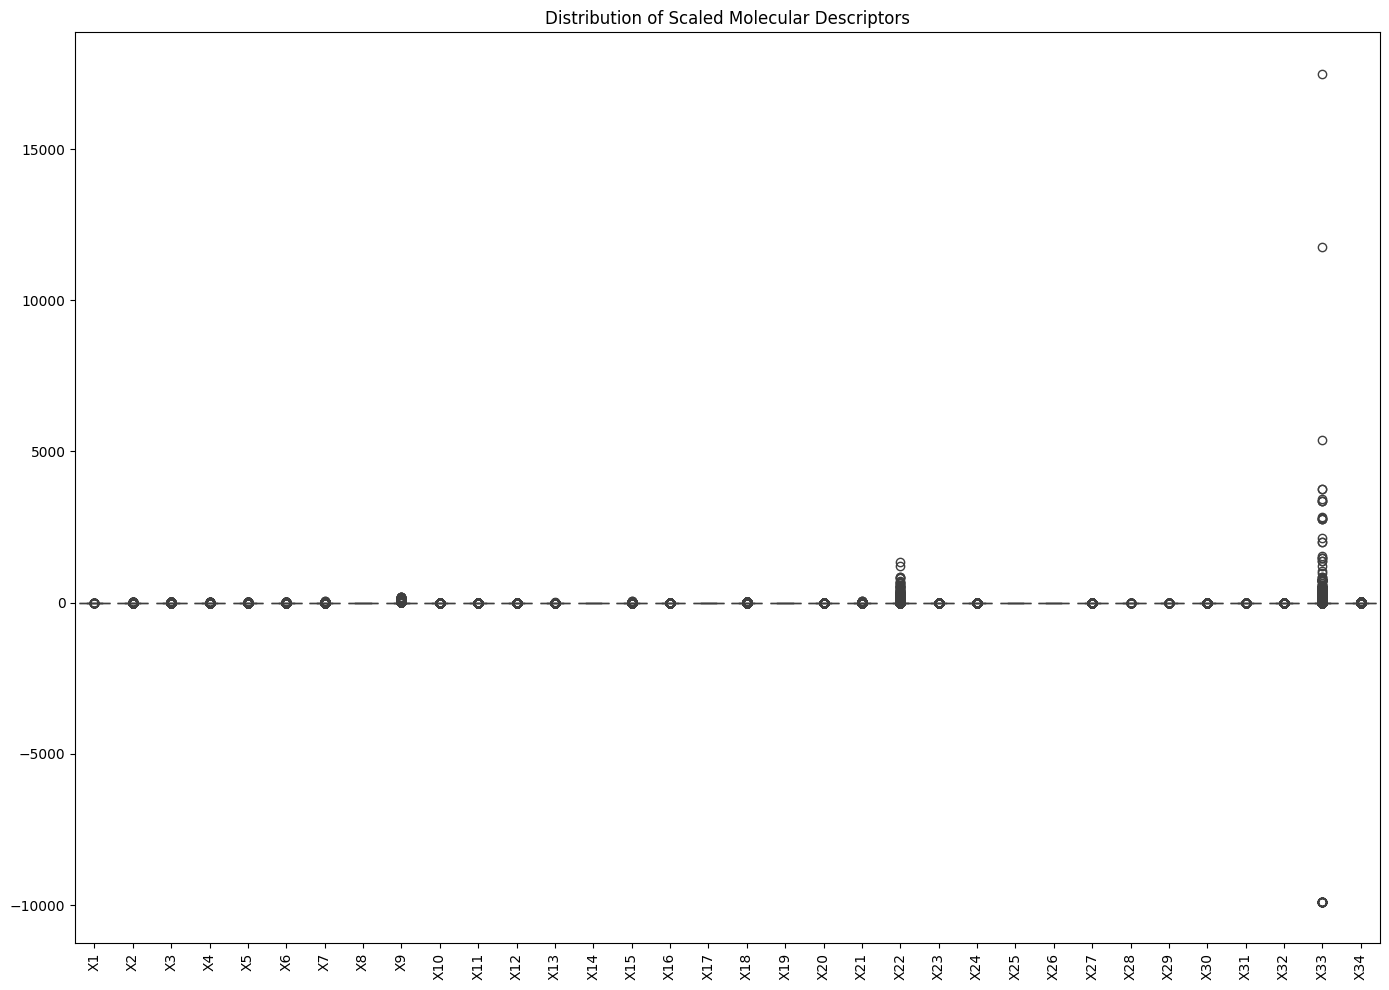

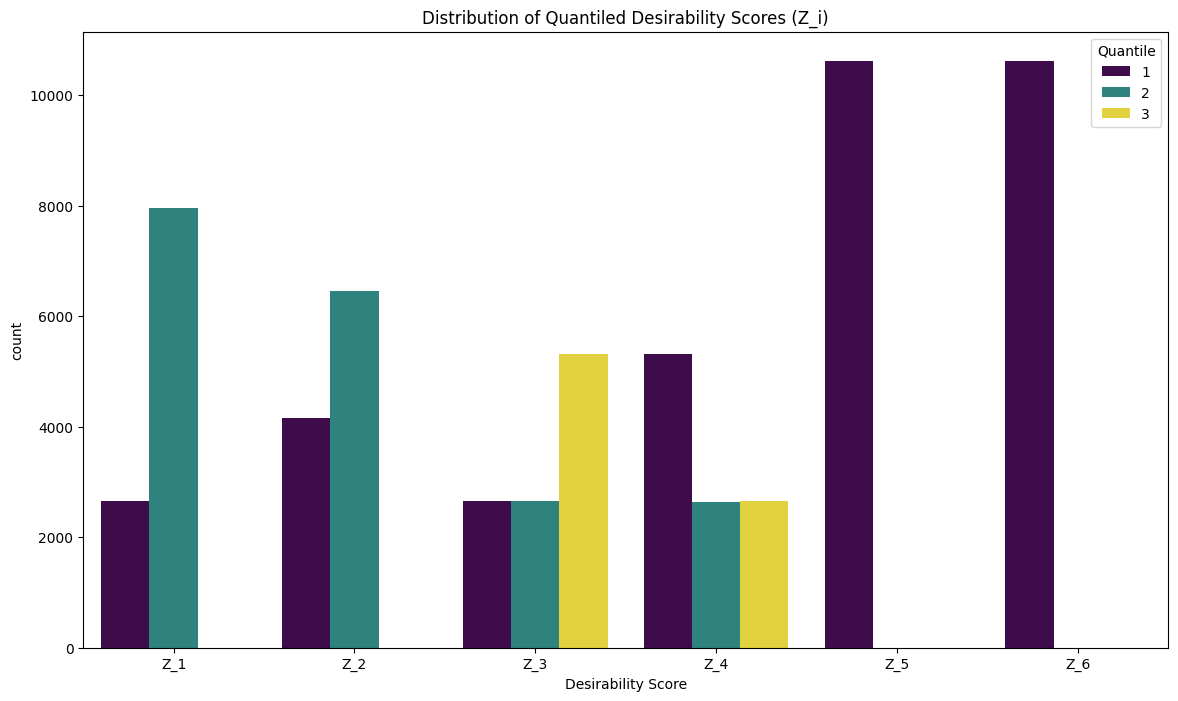

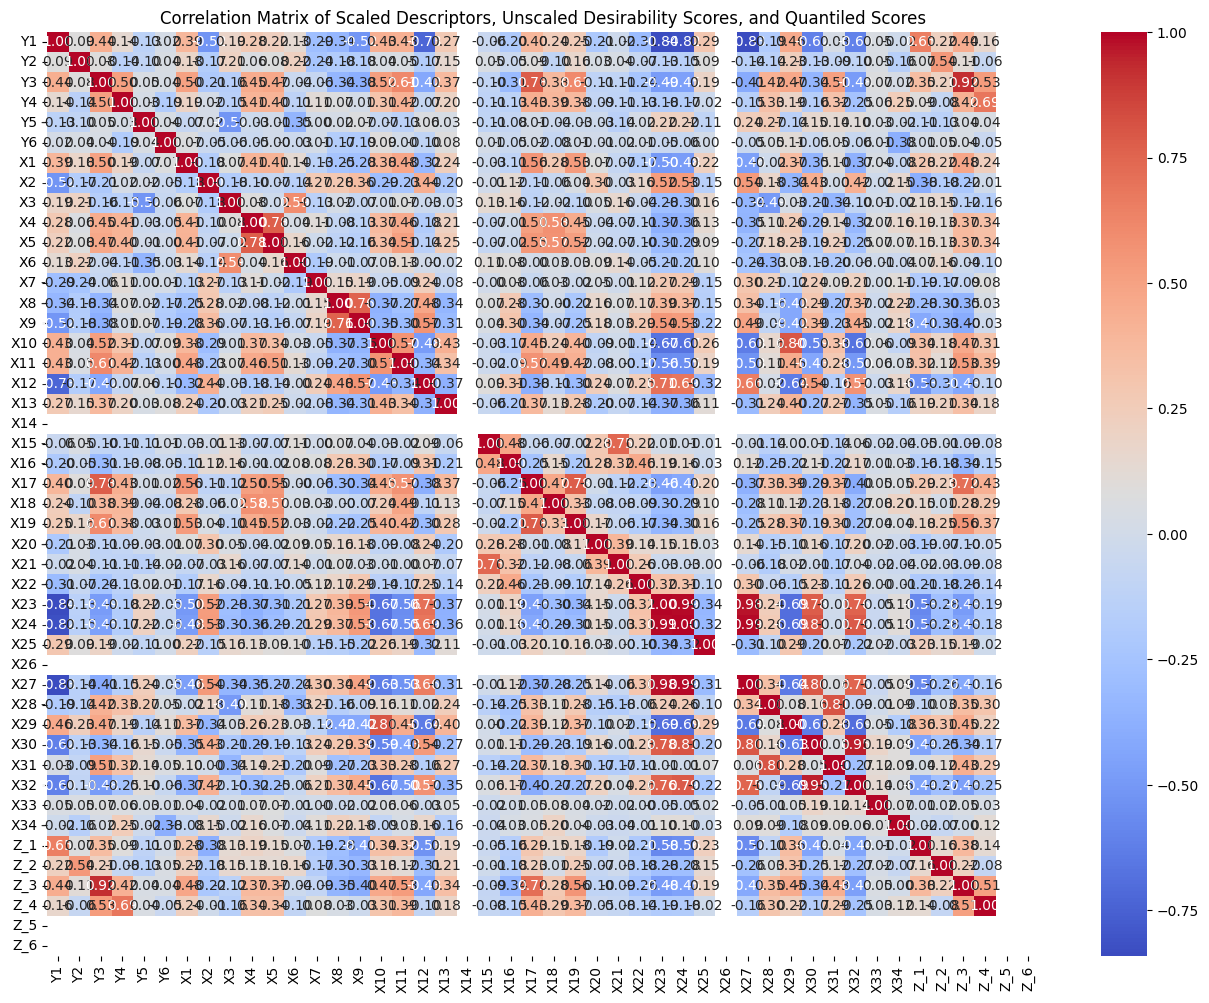

Processing complete. The processed dataset has been saved as 'processed_data.csv'.


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset, specifying the tab delimiter
df = pd.read_csv('dataProject.txt', delimiter='\t')

# Display the first few rows to check if the data is parsed correctly
print("Original Dataset Head:\n", df.head())

# Assuming the first 34 columns are X_i and the next 6 columns are Y_i
X = df.iloc[:, 8:]  # The molecular descriptors (ignoring the first 8 columns)
Y = df.iloc[:, 2:8]  # The desirability scores, which we will leave unscaled

# Convert columns to numeric, coercing errors (e.g., handle potential parsing issues)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values resulting from the conversion
X = X.dropna()

# Scaling the X_i using RobustScaler to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to a DataFrame for better handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Create quantiled Y_i as Z_i using quantiles
Z = pd.DataFrame()
for i in range(Y.shape[1]):
    Z[f'Z_{i+1}'] = pd.qcut(Y.iloc[:, i], q=4, labels=False, duplicates='drop') + 1

# Combine the unscaled Y_i, scaled X, and Z_i into a single DataFrame
processed_data = pd.concat([Y.reset_index(drop=True), X_scaled_df, Z], axis=1)

# Display the first few rows of the processed data
print("Processed Data Head:\n", processed_data.head())

# Plotting the distribution of the scaled descriptors
plt.figure(figsize=(14, 10))
sns.boxplot(data=X_scaled_df)
plt.title('Distribution of Scaled Molecular Descriptors')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the distribution of the quantiled desirability scores (Z_i)
plt.figure(figsize=(14, 8))
Z_melted = Z.melt(var_name='Desirability Score', value_name='Quantile')
sns.countplot(data=Z_melted, x='Desirability Score', hue='Quantile', palette='viridis')
plt.title('Distribution of Quantiled Desirability Scores (Z_i)')
plt.show()

# Correlation matrix of X_scaled, Y, and Z
corr_matrix = processed_data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Descriptors, Unscaled Desirability Scores, and Quantiled Scores')
plt.show()

# Save the processed data to a new CSV file (if needed)
processed_data.to_csv('processed_data.csv', index=False)

print("Processing complete. The processed dataset has been saved as 'processed_data.csv'.")


Original Dataset Head:
    Observation     Y_ALL   Y1        Y2      Y3     Y4      Y5   Y6     X1  \
1            1  5.680000  1.0  1.000000  1.0000  0.680  1.0000  1.0  31.56   
2            2  5.545000  1.0  1.000000  1.0000  0.545  1.0000  1.0  44.43   
3            3  5.680000  1.0  1.000000  1.0000  0.680  1.0000  1.0  31.56   
4            5  3.589000  1.0  1.000000  0.0535  0.000  0.5355  1.0   0.00   
5            8  5.833333  1.0  0.833333  1.0000  1.000  1.0000  1.0  32.58   

     X2  ...  X25  X26      X27     X28       X29    X30    X31    X32  \
1  0.94  ...    1    0  259.328  69.879  3.016646  583.1  138.2  444.9   
2  0.86  ...    1    0  237.024  62.239  3.630737  440.0  132.3  307.8   
3  0.94  ...    1    0  259.328  69.879  3.016646  583.1  138.2  444.9   
4  1.17  ...    1    0  242.633  25.124  2.811808  471.7   22.0  449.6   
5  0.54  ...    1    0  184.551  58.448  4.163898  454.5   78.8  375.7   

        X33   X34  
1  0.001510  4.77  
2  0.001020  2.42  
3 

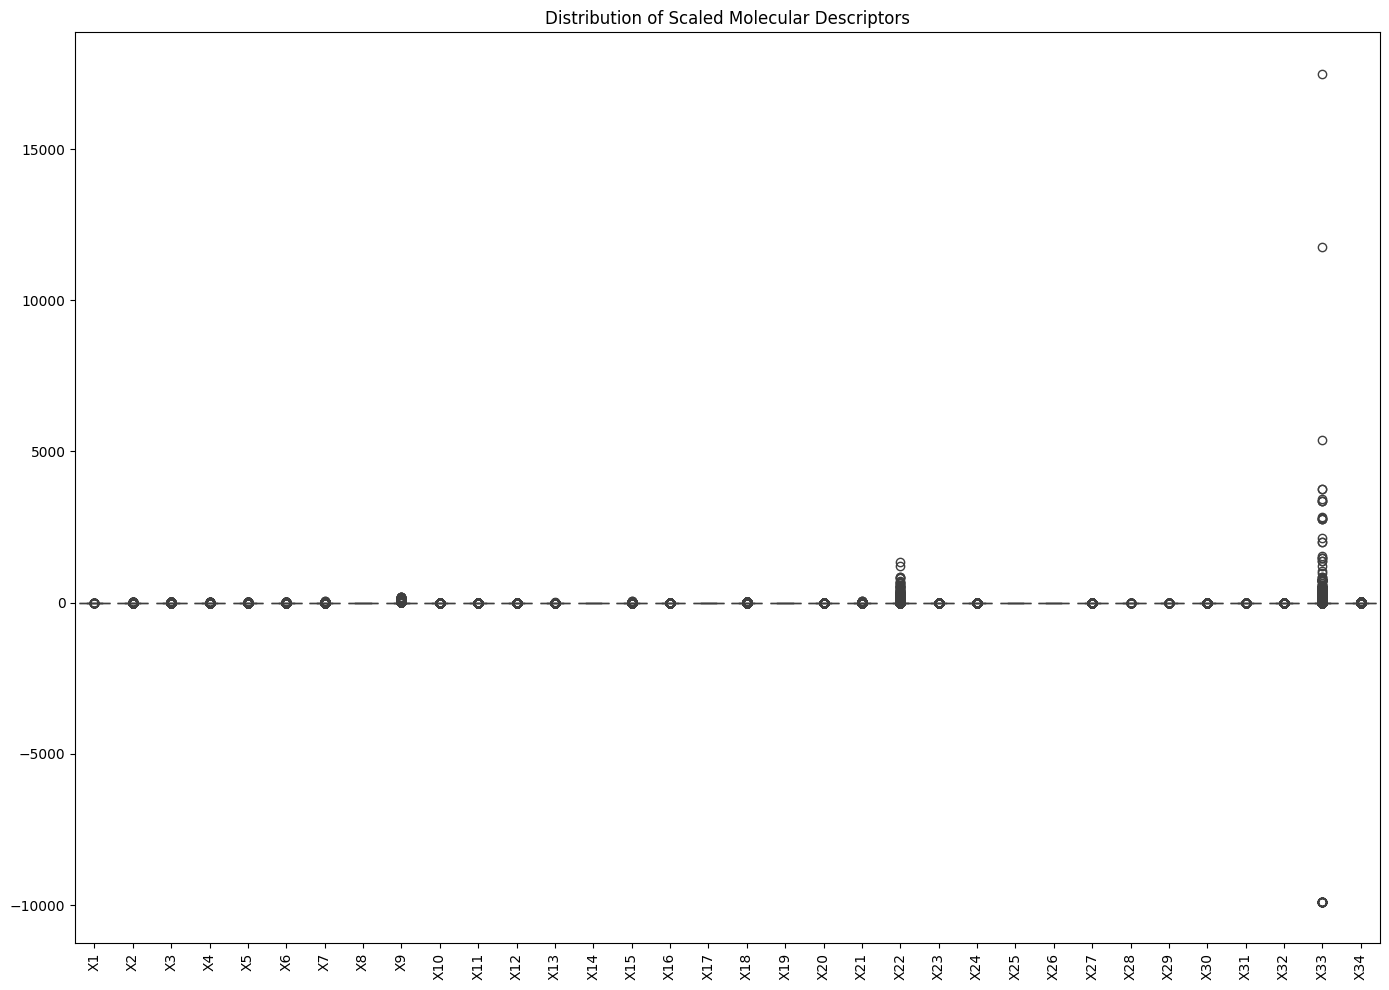

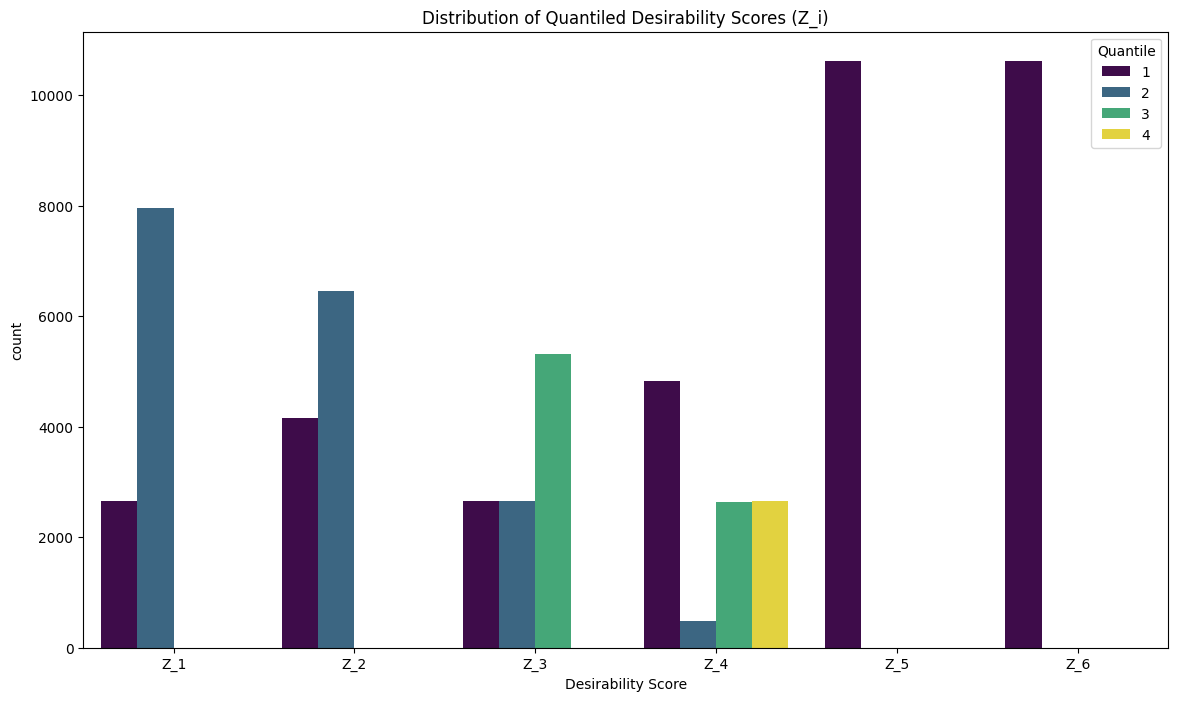

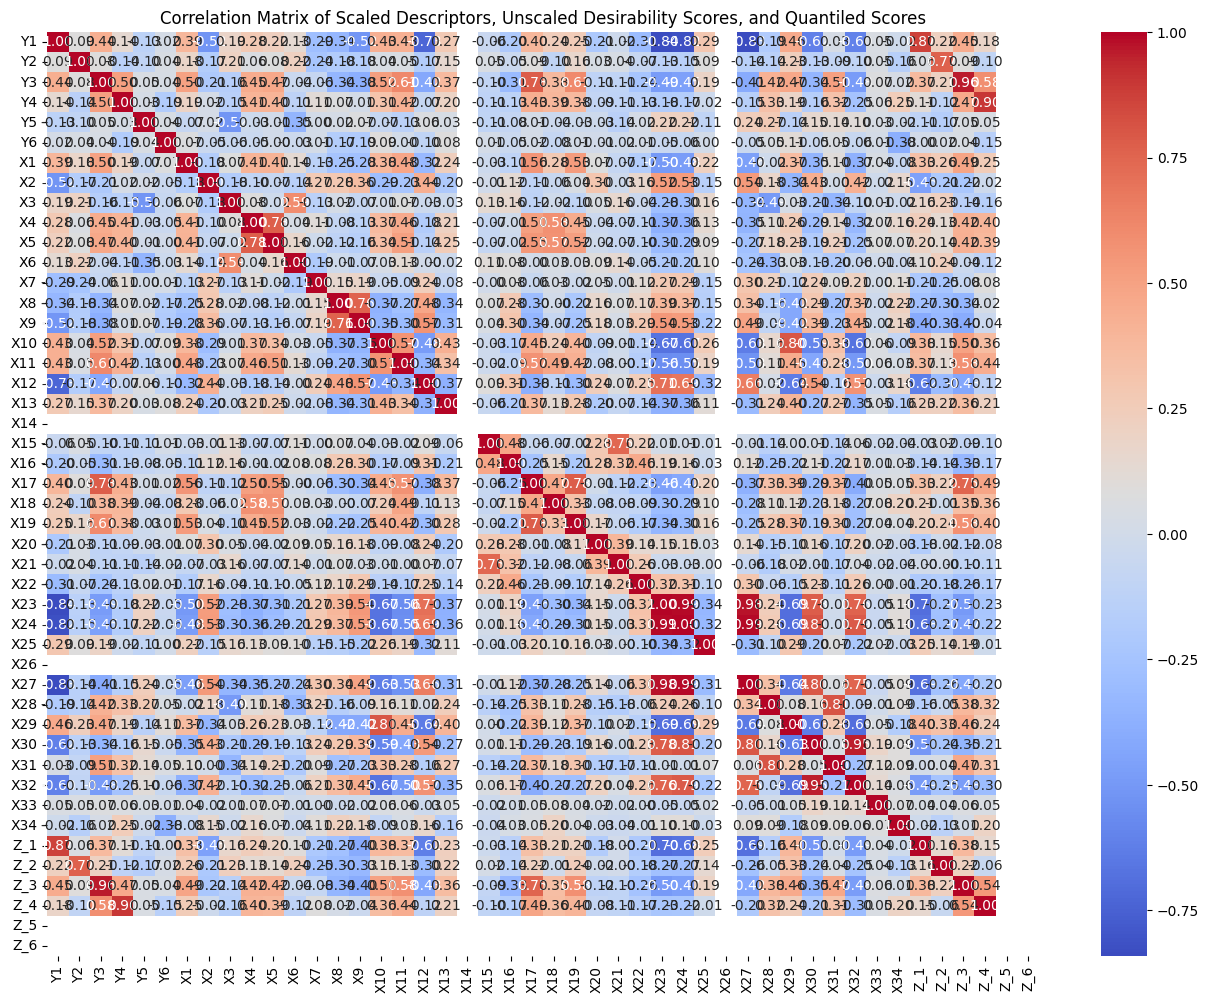

Processing complete. The processed dataset has been saved as 'processed_data.csv'.


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset, specifying the tab delimiter
df = pd.read_csv('dataProject.txt', delimiter='\t')

# Display the first few rows to check if the data is parsed correctly
print("Original Dataset Head:\n", df.head())

# Assuming the first 34 columns are X_i and the next 6 columns are Y_i
X = df.iloc[:, 8:]  # The molecular descriptors (ignoring the first 8 columns)
Y = df.iloc[:, 2:8]  # The desirability scores, which we will leave unscaled

# Convert columns to numeric, coercing errors (e.g., handle potential parsing issues)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values resulting from the conversion
X = X.dropna()

# Scaling the X_i using RobustScaler to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Convert X_scaled back to a DataFrame for better handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Reset index for consistency before concatenation
X_scaled_df.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)

# Initialize an empty DataFrame to store Z values
Z = pd.DataFrame()

# Calculate Z_i for each Y_i based on quantiles
for i in range(Y.shape[1]):
    y_col = Y.iloc[:, i]

    # Calculate quantiles
    Q1 = y_col.quantile(0.25)
    Q2 = y_col.quantile(0.50)
    Q3 = y_col.quantile(0.75)

    # Assign Z_i based on quantile ranges
    Z[f'Z_{i+1}'] = y_col.apply(lambda y: 1 if y <= Q1 else 2 if y <= Q2 else 3 if y <= Q3 else 4)

# Reset index for Z as well
Z.reset_index(drop=True, inplace=True)

# Combine the unscaled Y_i, scaled X, and Z_i into a single DataFrame
processed_data = pd.concat([Y, X_scaled_df, Z], axis=1)

# Display the first few rows of the processed data to check alignment
print("Processed Data Head:\n", processed_data.head())

# Plotting the distribution of the scaled descriptors
plt.figure(figsize=(14, 10))
sns.boxplot(data=X_scaled_df)
plt.title('Distribution of Scaled Molecular Descriptors')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the distribution of the quantiled desirability scores (Z_i)
plt.figure(figsize=(14, 8))
Z_melted = Z.melt(var_name='Desirability Score', value_name='Quantile')
sns.countplot(data=Z_melted, x='Desirability Score', hue='Quantile', palette='viridis')
plt.title('Distribution of Quantiled Desirability Scores (Z_i)')
plt.show()

# Correlation matrix of X_scaled, Y, and Z
corr_matrix = processed_data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Descriptors, Unscaled Desirability Scores, and Quantiled Scores')
plt.show()

# Save the processed data to a new CSV file (if needed)
processed_data.to_csv('processed_data.csv', index=False)

print("Processing complete. The processed dataset has been saved as 'processed_data.csv'.")


**bold text**  Methodology Part in General

Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X31       X32         X33       X34  Z_1  Z_2  Z_3  \
0  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
1  2.278657  ...  1.157993 -2.097747    9.977374 -0.547297    2    2    3   
2  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
3 -0.366758  ... -0.892193 -1.067224    0.016797 -1.152027    2    2    1   
4  0.802744  ...  0.163569 -1.604288  751.808634 -0.554054    2    1    3   

   Z_4  Z_5  Z_6  
0    4    1    1  
1    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Lasso-selected features (Principal Components): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 26 27 28 29 30 31 32 33]
Coefficients of selected features: [ 1.24251119e-02 -5.35299504e-02  4.16807698e-02  4.04483179e-02
  4.31659359e-02  1.57111825e-02 -6.01866978e-03 -3.16061020e-03
 -6.34727776e-04  3.06307539e-02  1.84430134e-02 -2.84837622e-02
  1.70607764e-02  7.20006318e-03  2.25424201e-03  4.34714986e-03
  7.80054474e-02  5.60758231e-03 -3.02519072e-02  1.70180956e-02
 -1.22598132e-03 -5.00175781e-02 -4.92227235e-02 -3.21167665e-03
 -4.97496363e-02 -6.96864460e-03  1.60162517e-02 -3.26653935e-02
 -2.77738610e-04 -2.87879678e-02  5.40666488e-05  9.90354935e-03]
Composite Score Head:
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


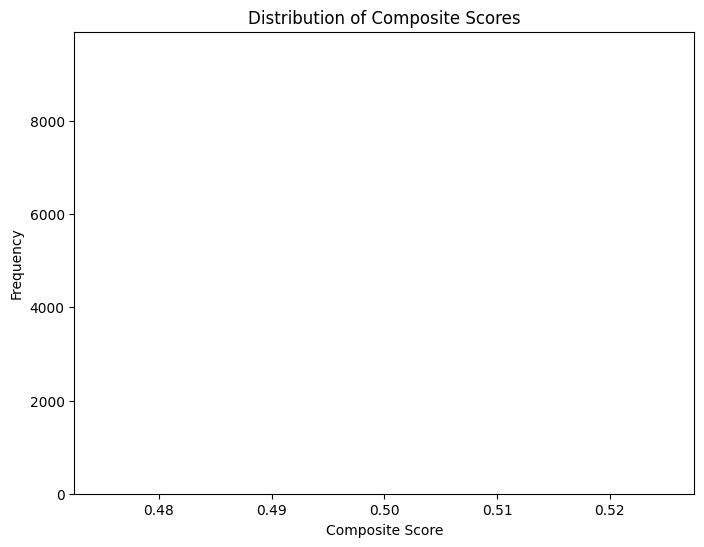

Lasso Penalized Multinomial Logistic Regression completed. Summary of selected features:
Principal Component 1: Coefficient = 0.01242511193350898
Principal Component 2: Coefficient = -0.05352995037441032
Principal Component 3: Coefficient = 0.04168076981043807
Principal Component 4: Coefficient = 0.0404483179223009
Principal Component 5: Coefficient = 0.04316593585743032
Principal Component 6: Coefficient = 0.01571118251110477
Principal Component 7: Coefficient = -0.0060186697839163805
Principal Component 8: Coefficient = -0.003160610200731041
Principal Component 9: Coefficient = -0.0006347277759718794
Principal Component 10: Coefficient = 0.030630753860427993
Principal Component 11: Coefficient = 0.018443013374022522
Principal Component 12: Coefficient = -0.028483762225044482
Principal Component 13: Coefficient = 0.017060776398295865
Principal Component 15: Coefficient = 0.007200063178160315
Principal Component 16: Coefficient = 0.0022542420102594192
Principal Component 17: Coefficien

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the processed dataset with pre-calculated Z_i values
processed_df = pd.read_csv('processed_data.csv')

# Display the first few rows to check if the data is loaded correctly
print("Processed Dataset Head:\n", processed_df.head())

# Extract relevant data
Y = processed_df.iloc[:, :6]  # Extracting Y1 to Y6
X_pca = processed_df.iloc[:, 6:-6]  # Assuming the next set of columns are X_pca components
Z_1 = processed_df['Z_1']  # Using pre-calculated Z_1

# --------------- Revised Methodology ---------------

# 1. Lasso-Penalized Logistic Regression (as a proxy for ordinal regression with regularization)

# Fit a multinomial logistic regression using Lasso regularization
lasso_model = LogisticRegressionCV(
    Cs=10,
    penalty='l1',
    solver='saga',  # 'saga' solver supports L1 regularization with multinomial models
    cv=5,
    scoring='accuracy',
    multi_class='multinomial',
    max_iter=5000  # Increase max_iter to help with convergence
)

lasso_model.fit(X_pca, Z_1)

# Display the coefficients and selected features
coefficients = lasso_model.coef_[0]
selected_features = np.where(coefficients != 0)[0]

print(f'Lasso-selected features (Principal Components): {selected_features}')
print(f'Coefficients of selected features: {coefficients[selected_features]}')

# 2. Composite Score Construction
# Aggregate the predicted probabilities for each ordinal model
probs = lasso_model.predict_proba(X_pca)

# Composite score (weighted sum with equal weights for this example)
composite_score = probs.dot(np.ones(probs.shape[1]) / probs.shape[1])

# Check composite score values
print("Composite Score Head:\n", composite_score[:10])

# Display the composite score distribution
plt.figure(figsize=(8, 6))
sns.histplot(composite_score, kde=True)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()

# --------------- End of Revised Methodology ---------------

# Summary of findings
print("Lasso Penalized Multinomial Logistic Regression completed. Summary of selected features:")
for idx in selected_features:
    print(f"Principal Component {idx + 1}: Coefficient = {coefficients[idx]}")

# Save the results
result_df = pd.concat([processed_df, pd.DataFrame(composite_score, columns=['Composite_Score'])], axis=1)
result_df.to_csv('final_results_with_pca_and_lasso.csv', index=False)
print("Processing complete. The final results have been saved as 'final_results_with_pca_and_lasso.csv'.")


Python Code for Objective 1

Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X31       X32         X33       X34  Z_1  Z_2  Z_3  \
0  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
1  2.278657  ...  1.157993 -2.097747    9.977374 -0.547297    2    2    3   
2  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
3 -0.366758  ... -0.892193 -1.067224    0.016797 -1.152027    2    2    1   
4  0.802744  ...  0.163569 -1.604288  751.808634 -0.554054    2    1    3   

   Z_4  Z_5  Z_6  
0    4    1    1  
1    

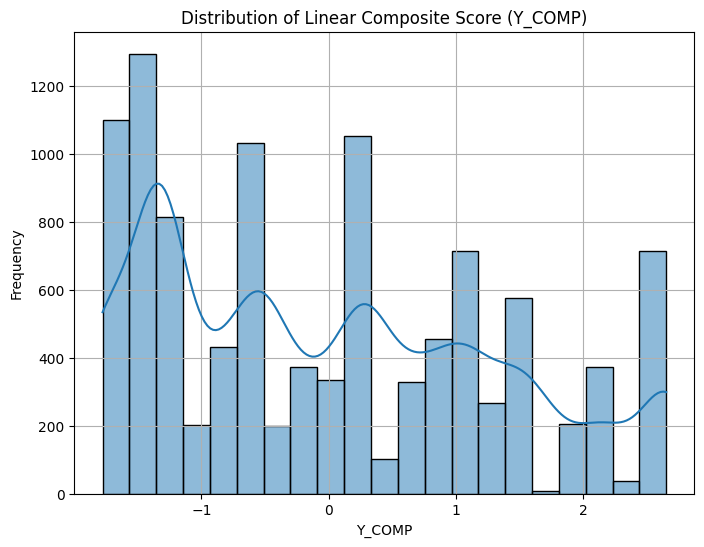

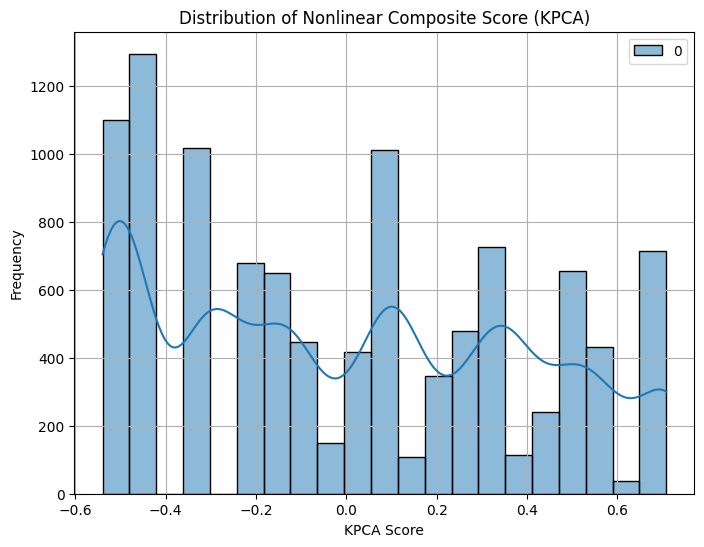

ValueError: All arrays must be of the same length

In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset with pre-calculated Z_i values
processed_df = pd.read_csv('processed_data.csv')

# Display the first few rows to check if the data is loaded correctly
print("Processed Dataset Head:\n", processed_df.head())

# Extract the Z_i variables (ordinal variables)
Z = processed_df[['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']]

# Standardize the Z_i variables before PCA
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

# 1. Principal Component Analysis (PCA) for Weight Optimization

# Perform PCA on the Z_i variables
pca = PCA(n_components=1)
pca.fit(Z_scaled)

# Extract the first principal component as the weights
weights = pca.components_[0]
print(f"Optimal Weights from PCA: {weights}")

# Construct the weighted overall desirability score Y_COMP
Y_COMP_linear = Z_scaled.dot(weights)

# Plot the distribution of the Y_COMP score
plt.figure(figsize=(8, 6))
sns.histplot(Y_COMP_linear, kde=True)
plt.title('Distribution of Linear Composite Score (Y_COMP)')
plt.xlabel('Y_COMP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Kernel PCA (KPCA) for Nonlinear Dimensionality Reduction

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=0.1)  # Adjust gamma as needed
Z_kpca = kpca.fit_transform(Z_scaled)

# Plot the distribution of the nonlinear composite score (Kernel PCA)
plt.figure(figsize=(8, 6))
sns.histplot(Z_kpca, kde=True)
plt.title('Distribution of Nonlinear Composite Score (KPCA)')
plt.xlabel('KPCA Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a summary table showing weights and the first few rows of Y_COMP
summary_table = pd.DataFrame({
    'Weight': weights,
    'Z_1': Z['Z_1'],
    'Z_2': Z['Z_2'],
    'Z_3': Z['Z_3'],
    'Z_4': Z['Z_4'],
    'Z_5': Z['Z_5'],
    'Z_6': Z['Z_6'],
    'Y_COMP_Linear': Y_COMP_linear,
    'Y_COMP_Nonlinear': Z_kpca.flatten()
})

# Display the first few rows of the summary table
print("Summary Table:\n", summary_table.head())

# Save the summary table to a CSV file (optional)
summary_table.to_csv('summary_table_objective_1.csv', index=False)
print("Summary table saved as 'summary_table_objective_1.csv'.")

# Plot the relationship between Y_COMP_Linear and Y_COMP_Nonlinear
plt.figure(figsize=(8, 6))
plt.scatter(Y_COMP_linear, Z_kpca.flatten(), alpha=0.5)
plt.title('Relationship between Linear and Nonlinear Composite Scores')
plt.xlabel('Linear Composite Score (Y_COMP)')
plt.ylabel('Nonlinear Composite Score (KPCA)')
plt.grid(True)
plt.show()


Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X31       X32         X33       X34  Z_1  Z_2  Z_3  \
0  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
1  2.278657  ...  1.157993 -2.097747    9.977374 -0.547297    2    2    3   
2  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
3 -0.366758  ... -0.892193 -1.067224    0.016797 -1.152027    2    2    1   
4  0.802744  ...  0.163569 -1.604288  751.808634 -0.554054    2    1    3   

   Z_4  Z_5  Z_6  
0    4    1    1  
1    

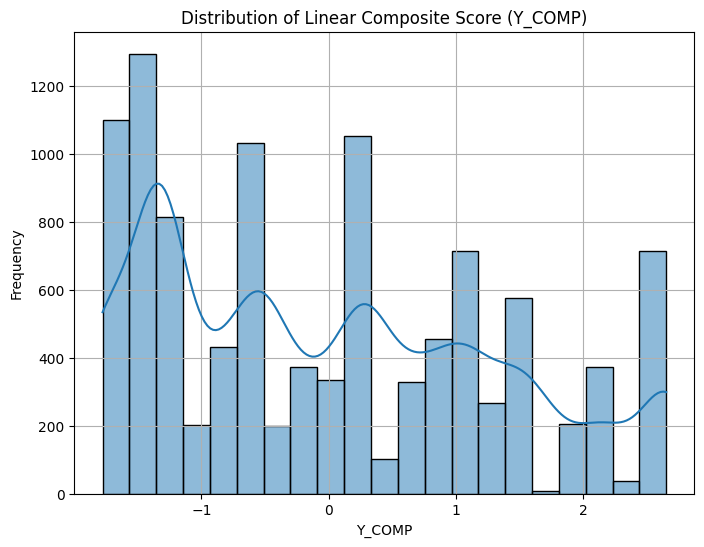

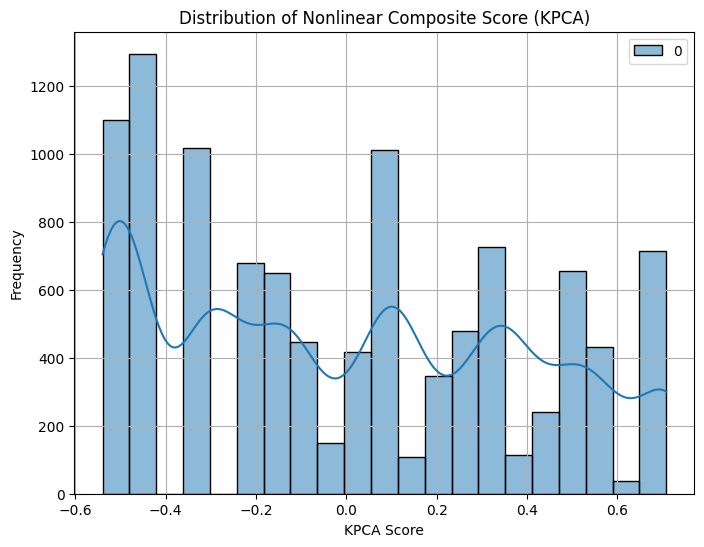

Summary Table:
    Z_1  Z_2  Z_3  Z_4  Z_5  Z_6  Y_COMP_Linear  Y_COMP_Nonlinear
0    2    2    3    4    1    1      -1.776840         -0.539632
1    2    2    3    4    1    1      -1.776840         -0.539632
2    2    2    3    4    1    1      -1.776840         -0.539632
3    2    2    1    1    1    1       1.073194          0.350327
4    2    1    3    4    1    1      -1.283160         -0.318100
Summary table saved as 'summary_table_objective_1.csv'.


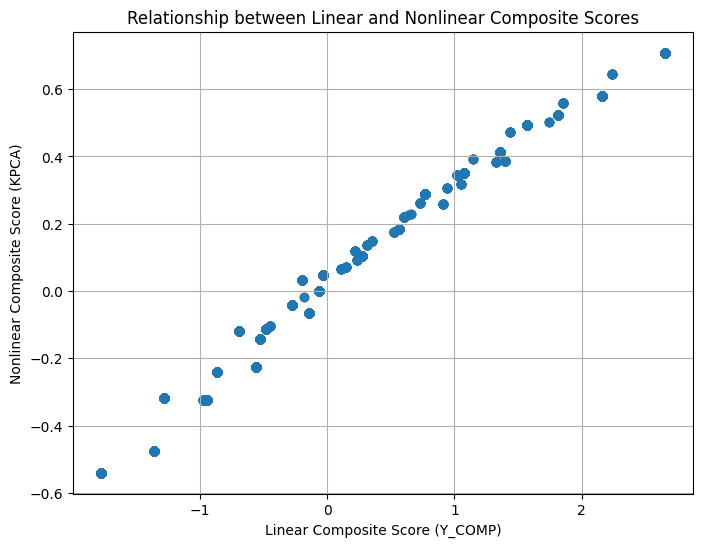

Weights used in Y_COMP calculation:
Z_1: -0.470462616640491
Z_2: -0.24092299939019557
Z_3: -0.6624175172967808
Z_4: -0.5308710460055086
Z_5: -0.0
Z_6: -0.0


In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset with pre-calculated Z_i values
processed_df = pd.read_csv('processed_data.csv')

# Display the first few rows to check if the data is loaded correctly
print("Processed Dataset Head:\n", processed_df.head())

# Extract the Z_i variables (ordinal variables)
Z = processed_df[['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']]

# Standardize the Z_i variables before PCA
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

# 1. Principal Component Analysis (PCA) for Weight Optimization

# Perform PCA on the Z_i variables
pca = PCA(n_components=1)
pca.fit(Z_scaled)

# Extract the first principal component as the weights
weights = pca.components_[0]
print(f"Optimal Weights from PCA: {weights}")

# Construct the weighted overall desirability score Y_COMP
Y_COMP_linear = Z_scaled.dot(weights)

# Plot the distribution of the Y_COMP score
plt.figure(figsize=(8, 6))
sns.histplot(Y_COMP_linear, kde=True)
plt.title('Distribution of Linear Composite Score (Y_COMP)')
plt.xlabel('Y_COMP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Kernel PCA (KPCA) for Nonlinear Dimensionality Reduction

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=0.1)  # Adjust gamma as needed
Z_kpca = kpca.fit_transform(Z_scaled)

# Plot the distribution of the nonlinear composite score (Kernel PCA)
plt.figure(figsize=(8, 6))
sns.histplot(Z_kpca, kde=True)
plt.title('Distribution of Nonlinear Composite Score (KPCA)')
plt.xlabel('KPCA Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a summary table showing the first few rows of Y_COMP along with the Z_i values
summary_table = pd.DataFrame({
    'Z_1': Z['Z_1'],
    'Z_2': Z['Z_2'],
    'Z_3': Z['Z_3'],
    'Z_4': Z['Z_4'],
    'Z_5': Z['Z_5'],
    'Z_6': Z['Z_6'],
    'Y_COMP_Linear': Y_COMP_linear,
    'Y_COMP_Nonlinear': Z_kpca.flatten()
})

# Display the first few rows of the summary table
print("Summary Table:\n", summary_table.head())

# Save the summary table to a CSV file (optional)
summary_table.to_csv('summary_table_objective_1.csv', index=False)
print("Summary table saved as 'summary_table_objective_1.csv'.")

# Plot the relationship between Y_COMP_Linear and Y_COMP_Nonlinear
plt.figure(figsize=(8, 6))
plt.scatter(Y_COMP_linear, Z_kpca.flatten(), alpha=0.5)
plt.title('Relationship between Linear and Nonlinear Composite Scores')
plt.xlabel('Linear Composite Score (Y_COMP)')
plt.ylabel('Nonlinear Composite Score (KPCA)')
plt.grid(True)
plt.show()

# Display the weights separately as they are not row-specific
print("Weights used in Y_COMP calculation:")
for i, weight in enumerate(weights):
    print(f"Z_{i+1}: {weight}")


Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X31       X32         X33       X34  Z_1  Z_2  Z_3  \
0  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
1  2.278657  ...  1.157993 -2.097747    9.977374 -0.547297    2    2    3   
2  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
3 -0.366758  ... -0.892193 -1.067224    0.016797 -1.152027    2    2    1   
4  0.802744  ...  0.163569 -1.604288  751.808634 -0.554054    2    1    3   

   Z_4  Z_5  Z_6  
0    4    1    1  
1    

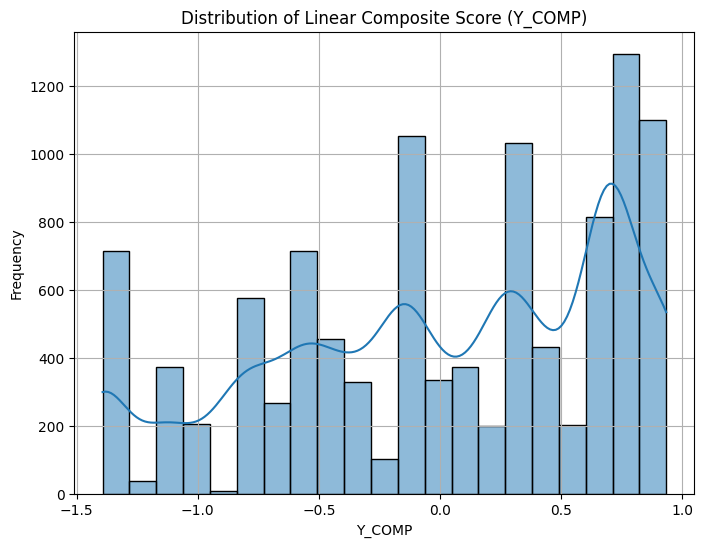

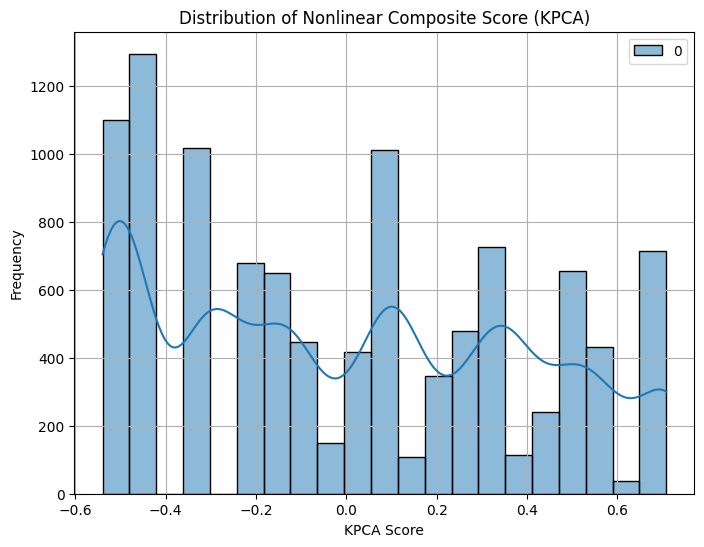

Summary Table:
    Z_1  Z_2  Z_3  Z_4  Z_5  Z_6  Y_COMP_Linear  Y_COMP_Nonlinear
0    2    2    3    4    1    1       0.932884         -0.539632
1    2    2    3    4    1    1       0.932884         -0.539632
2    2    2    3    4    1    1       0.932884         -0.539632
3    2    2    1    1    1    1      -0.563453          0.350327
4    2    1    3    4    1    1       0.673690         -0.318100
Summary table saved as 'summary_table_objective_1.csv'.


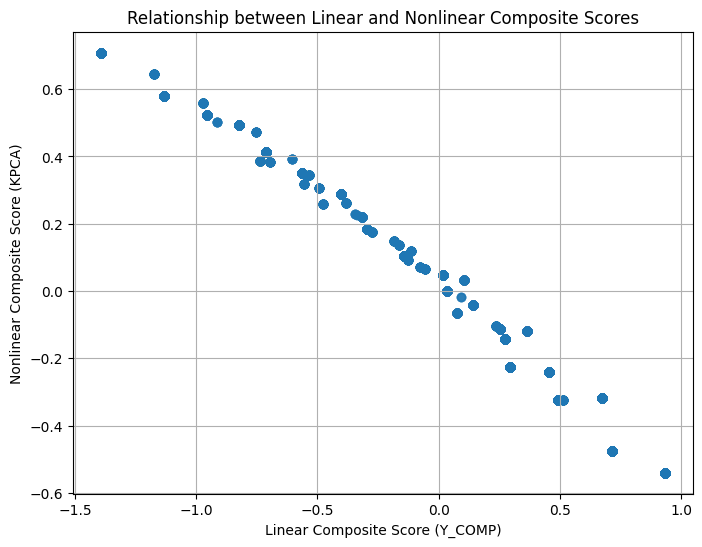

Normalized Weights used in Y_COMP calculation:
Z_1: 0.24700424972697982
Z_2: 0.12649040030277897
Z_3: 0.3477852141245291
Z_4: 0.27872013584571215
Z_5: 0.0
Z_6: 0.0


In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset with pre-calculated Z_i values
processed_df = pd.read_csv('processed_data.csv')

# Display the first few rows to check if the data is loaded correctly
print("Processed Dataset Head:\n", processed_df.head())

# Extract the Z_i variables (ordinal variables)
Z = processed_df[['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']]

# Standardize the Z_i variables before PCA
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

# 1. Principal Component Analysis (PCA) for Weight Optimization

# Perform PCA on the Z_i variables
pca = PCA(n_components=1)
pca.fit(Z_scaled)

# Extract the first principal component as the raw weights
raw_weights = pca.components_[0]
print(f"Raw Weights from PCA: {raw_weights}")

# Ensure weights are non-negative and sum to 1
weights = np.abs(raw_weights)
weights /= weights.sum()
print(f"Normalized Weights: {weights}")

# Construct the weighted overall desirability score Y_COMP
Y_COMP_linear = Z_scaled.dot(weights)

# Plot the distribution of the Y_COMP score
plt.figure(figsize=(8, 6))
sns.histplot(Y_COMP_linear, kde=True)
plt.title('Distribution of Linear Composite Score (Y_COMP)')
plt.xlabel('Y_COMP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Kernel PCA (KPCA) for Nonlinear Dimensionality Reduction

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=0.1)  # Adjust gamma as needed
Z_kpca = kpca.fit_transform(Z_scaled)

# Plot the distribution of the nonlinear composite score (Kernel PCA)
plt.figure(figsize=(8, 6))
sns.histplot(Z_kpca, kde=True)
plt.title('Distribution of Nonlinear Composite Score (KPCA)')
plt.xlabel('KPCA Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a summary table showing the first few rows of Y_COMP along with the Z_i values
summary_table = pd.DataFrame({
    'Z_1': Z['Z_1'],
    'Z_2': Z['Z_2'],
    'Z_3': Z['Z_3'],
    'Z_4': Z['Z_4'],
    'Z_5': Z['Z_5'],
    'Z_6': Z['Z_6'],
    'Y_COMP_Linear': Y_COMP_linear,
    'Y_COMP_Nonlinear': Z_kpca.flatten()
})

# Display the first few rows of the summary table
print("Summary Table:\n", summary_table.head())

# Save the summary table to a CSV file (optional)
summary_table.to_csv('summary_table_objective_1.csv', index=False)
print("Summary table saved as 'summary_table_objective_1.csv'.")

# Plot the relationship between Y_COMP_Linear and Y_COMP_Nonlinear
plt.figure(figsize=(8, 6))
plt.scatter(Y_COMP_linear, Z_kpca.flatten(), alpha=0.5)
plt.title('Relationship between Linear and Nonlinear Composite Scores')
plt.xlabel('Linear Composite Score (Y_COMP)')
plt.ylabel('Nonlinear Composite Score (KPCA)')
plt.grid(True)
plt.show()

# Display the normalized weights
print("Normalized Weights used in Y_COMP calculation:")
for i, weight in enumerate(weights):
    print(f"Z_{i+1}: {weight}")


Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X31       X32         X33       X34  Z_1  Z_2  Z_3  \
0  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
1  2.278657  ...  1.157993 -2.097747    9.977374 -0.547297    2    2    3   
2  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
3 -0.366758  ... -0.892193 -1.067224    0.016797 -1.152027    2    2    1   
4  0.802744  ...  0.163569 -1.604288  751.808634 -0.554054    2    1    3   

   Z_4  Z_5  Z_6  
0    4    1    1  
1    

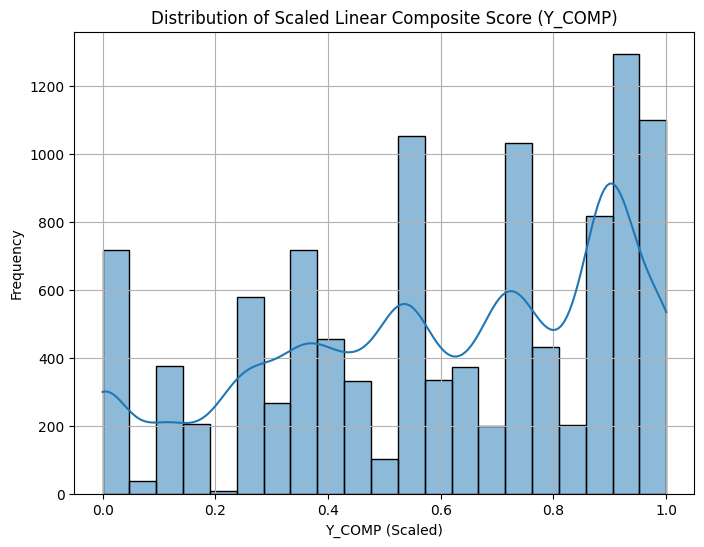

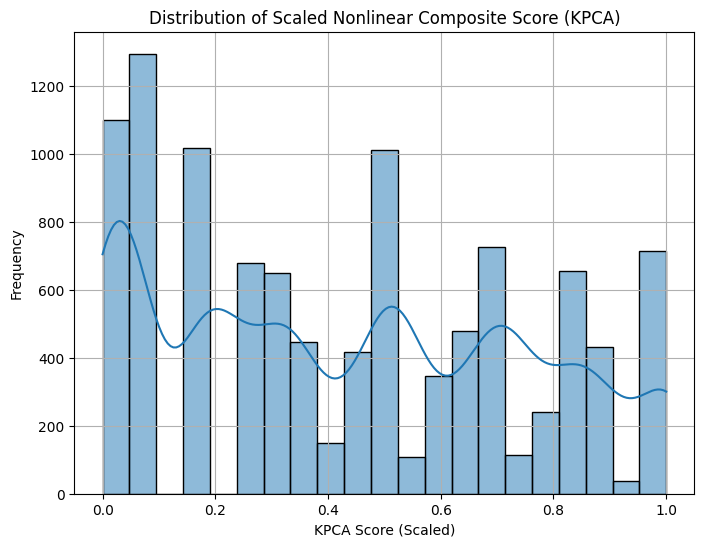

Summary Table:
    Z_1  Z_2  Z_3  Z_4  Z_5  Z_6  Y_COMP_Linear  Y_COMP_Nonlinear
0    2    2    3    4    1    1       1.000000      3.330669e-16
1    2    2    3    4    1    1       1.000000      3.330669e-16
2    2    2    3    4    1    1       1.000000      1.665335e-16
3    2    2    1    1    1    1       0.356631      7.133374e-01
4    2    1    3    4    1    1       0.888556      1.775664e-01
Summary table saved as 'summary_table_objective_1.csv'.


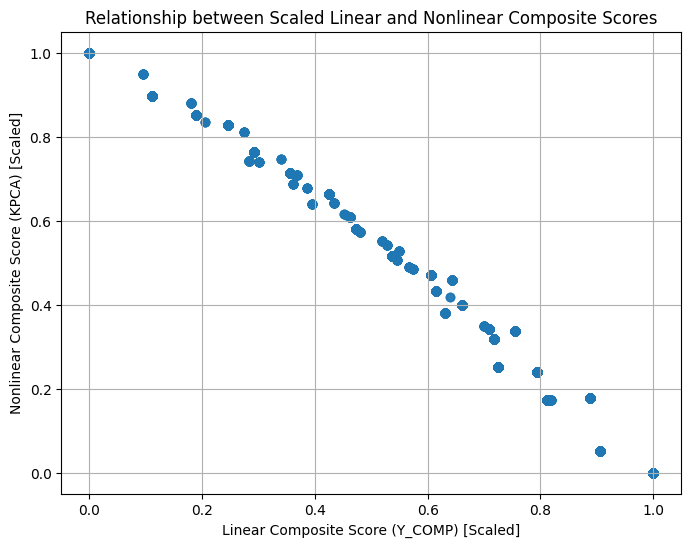

Normalized Weights used in Y_COMP calculation:
Z_1: 0.24700424972697843
Z_2: 0.12649040030277975
Z_3: 0.34778521412452906
Z_4: 0.2787201358457127
Z_5: 0.0
Z_6: 0.0


In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset with pre-calculated Z_i values
processed_df = pd.read_csv('processed_data.csv')

# Display the first few rows to check if the data is loaded correctly
print("Processed Dataset Head:\n", processed_df.head())

# Extract the Z_i variables (ordinal variables)
Z = processed_df[['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']]

# Standardize the Z_i variables before PCA
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

# 1. Principal Component Analysis (PCA) for Weight Optimization

# Perform PCA on the Z_i variables
pca = PCA(n_components=1)
pca.fit(Z_scaled)

# Extract the first principal component as the raw weights
raw_weights = pca.components_[0]
print(f"Raw Weights from PCA: {raw_weights}")

# Ensure weights are non-negative and sum to 1
weights = np.abs(raw_weights)
weights /= weights.sum()
print(f"Normalized Weights: {weights}")

# Construct the weighted overall desirability score Y_COMP
Y_COMP_linear = Z_scaled.dot(weights)

# Apply min-max normalization to Y_COMP_linear to bring it to the range [0, 1]
min_max_scaler = MinMaxScaler()
Y_COMP_linear_scaled = min_max_scaler.fit_transform(Y_COMP_linear.reshape(-1, 1)).flatten()

# Plot the distribution of the Y_COMP score
plt.figure(figsize=(8, 6))
sns.histplot(Y_COMP_linear_scaled, kde=True)
plt.title('Distribution of Scaled Linear Composite Score (Y_COMP)')
plt.xlabel('Y_COMP (Scaled)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Kernel PCA (KPCA) for Nonlinear Dimensionality Reduction

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=0.1)  # Adjust gamma as needed
Z_kpca = kpca.fit_transform(Z_scaled)

# Apply min-max normalization to Z_kpca to bring it to the range [0, 1]
Z_kpca_scaled = min_max_scaler.fit_transform(Z_kpca).flatten()

# Plot the distribution of the nonlinear composite score (Kernel PCA)
plt.figure(figsize=(8, 6))
sns.histplot(Z_kpca_scaled, kde=True)
plt.title('Distribution of Scaled Nonlinear Composite Score (KPCA)')
plt.xlabel('KPCA Score (Scaled)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a summary table showing the first few rows of Y_COMP along with the Z_i values
summary_table = pd.DataFrame({
    'Z_1': Z['Z_1'],
    'Z_2': Z['Z_2'],
    'Z_3': Z['Z_3'],
    'Z_4': Z['Z_4'],
    'Z_5': Z['Z_5'],
    'Z_6': Z['Z_6'],
    'Y_COMP_Linear': Y_COMP_linear_scaled,
    'Y_COMP_Nonlinear': Z_kpca_scaled
})

# Display the first few rows of the summary table
print("Summary Table:\n", summary_table.head())

# Save the summary table to a CSV file (optional)
summary_table.to_csv('summary_table_objective_1.csv', index=False)
print("Summary table saved as 'summary_table_objective_1.csv'.")

# Plot the relationship between Y_COMP_Linear and Y_COMP_Nonlinear
plt.figure(figsize=(8, 6))
plt.scatter(Y_COMP_linear_scaled, Z_kpca_scaled, alpha=0.5)
plt.title('Relationship between Scaled Linear and Nonlinear Composite Scores')
plt.xlabel('Linear Composite Score (Y_COMP) [Scaled]')
plt.ylabel('Nonlinear Composite Score (KPCA) [Scaled]')
plt.grid(True)
plt.show()

# Display the normalized weights
print("Normalized Weights used in Y_COMP calculation:")
for i, weight in enumerate(weights):
    print(f"Z_{i+1}: {weight}")


In [23]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create a directory for saving the plots and tables
output_dir = 'objective_1'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the processed dataset with pre-calculated Z_i values
processed_df = pd.read_csv('processed_data.csv')

# Display the first few rows to check if the data is loaded correctly
print("Processed Dataset Head:\n", processed_df.head())

# Extract the Z_i variables (ordinal variables)
Z = processed_df[['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']]

# Standardize the Z_i variables before PCA
scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

# 1. Principal Component Analysis (PCA) for Weight Optimization

# Perform PCA on the Z_i variables
pca = PCA(n_components=1)
pca.fit(Z_scaled)

# Extract the first principal component as the raw weights
raw_weights = pca.components_[0]
print(f"Raw Weights from PCA: {raw_weights}")

# Ensure weights are non-negative and sum to 1
weights = np.abs(raw_weights)
weights /= weights.sum()
print(f"Normalized Weights: {weights}")

# Construct the weighted overall desirability score Y_COMP
Y_COMP_linear = Z_scaled.dot(weights)

# Apply min-max normalization to Y_COMP_linear to bring it to the range [0, 1]
min_max_scaler = MinMaxScaler()
Y_COMP_linear_scaled = min_max_scaler.fit_transform(Y_COMP_linear.reshape(-1, 1)).flatten()

# Plot the distribution of the Y_COMP score
plt.figure(figsize=(8, 6))
sns.histplot(Y_COMP_linear_scaled, kde=True)
plt.title('Distribution of Scaled Linear Composite Score (Y_COMP)')
plt.xlabel('Y_COMP (Scaled)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'Y_COMP_scaled_distribution.png'))
plt.close()

# 2. Kernel PCA (KPCA) for Nonlinear Dimensionality Reduction

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=0.1)  # Adjust gamma as needed
Z_kpca = kpca.fit_transform(Z_scaled)

# Apply min-max normalization to Z_kpca to bring it to the range [0, 1]
Z_kpca_scaled = min_max_scaler.fit_transform(Z_kpca).flatten()

# Plot the distribution of the nonlinear composite score (Kernel PCA)
plt.figure(figsize=(8, 6))
sns.histplot(Z_kpca_scaled, kde=True)
plt.title('Distribution of Scaled Nonlinear Composite Score (KPCA)')
plt.xlabel('KPCA Score (Scaled)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'KPCA_scaled_distribution.png'))
plt.close()

# Create a summary table showing the first few rows of Y_COMP along with the Z_i values
summary_table = pd.DataFrame({
    'Z_1': Z['Z_1'],
    'Z_2': Z['Z_2'],
    'Z_3': Z['Z_3'],
    'Z_4': Z['Z_4'],
    'Z_5': Z['Z_5'],
    'Z_6': Z['Z_6'],
    'Y_COMP_Linear': Y_COMP_linear_scaled,
    'Y_COMP_Nonlinear': Z_kpca_scaled
})

# Save the summary table to a CSV file
summary_table_path = os.path.join(output_dir, 'summary_table_objective_1.csv')
summary_table.to_csv(summary_table_path, index=False)
print(f"Summary table saved as '{summary_table_path}'.")

# Plot the relationship between Y_COMP_Linear and Y_COMP_Nonlinear
plt.figure(figsize=(8, 6))
plt.scatter(Y_COMP_linear_scaled, Z_kpca_scaled, alpha=0.5)
plt.title('Relationship between Scaled Linear and Nonlinear Composite Scores')
plt.xlabel('Linear Composite Score (Y_COMP) [Scaled]')
plt.ylabel('Nonlinear Composite Score (KPCA) [Scaled]')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'linear_vs_nonlinear.png'))
plt.close()

# Display the normalized weights
weights_path = os.path.join(output_dir, 'weights.txt')
with open(weights_path, 'w') as f:
    f.write("Normalized Weights used in Y_COMP calculation:\n")
    for i, weight in enumerate(weights):
        f.write(f"Z_{i+1}: {weight}\n")
print(f"Weights saved as '{weights_path}'.")


Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X31       X32         X33       X34  Z_1  Z_2  Z_3  \
0  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
1  2.278657  ...  1.157993 -2.097747    9.977374 -0.547297    2    2    3   
2  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
3 -0.366758  ... -0.892193 -1.067224    0.016797 -1.152027    2    2    1   
4  0.802744  ...  0.163569 -1.604288  751.808634 -0.554054    2    1    3   

   Z_4  Z_5  Z_6  
0    4    1    1  
1    

Python Code for Objective 2

In [26]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.3 MB/s eta 0:00:00


Y_COMP not found in dataset, calculating Y_COMP...


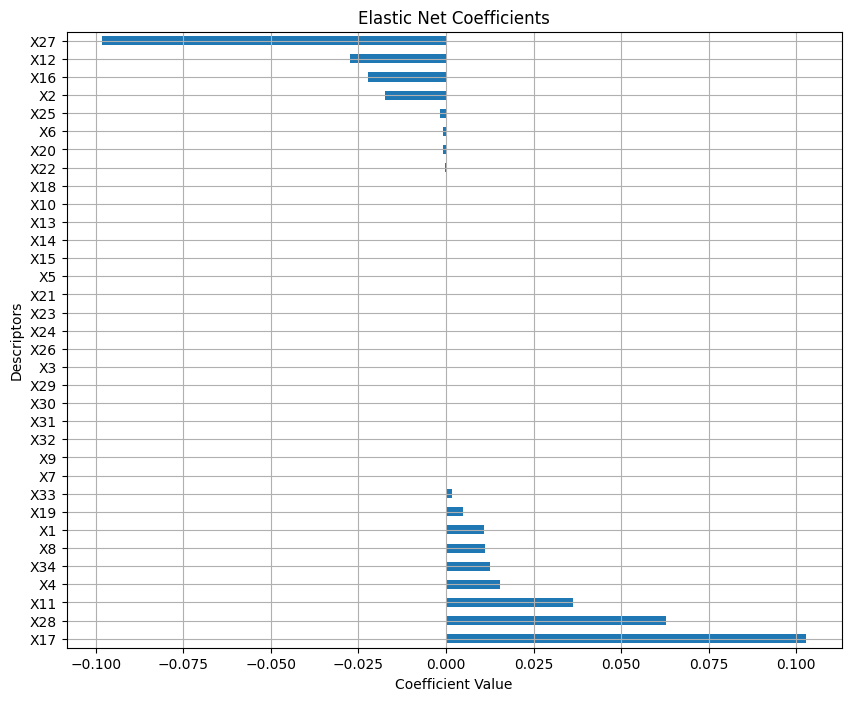

Elastic Net coefficients saved to 'elastic_net_coefficients.csv'.


/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


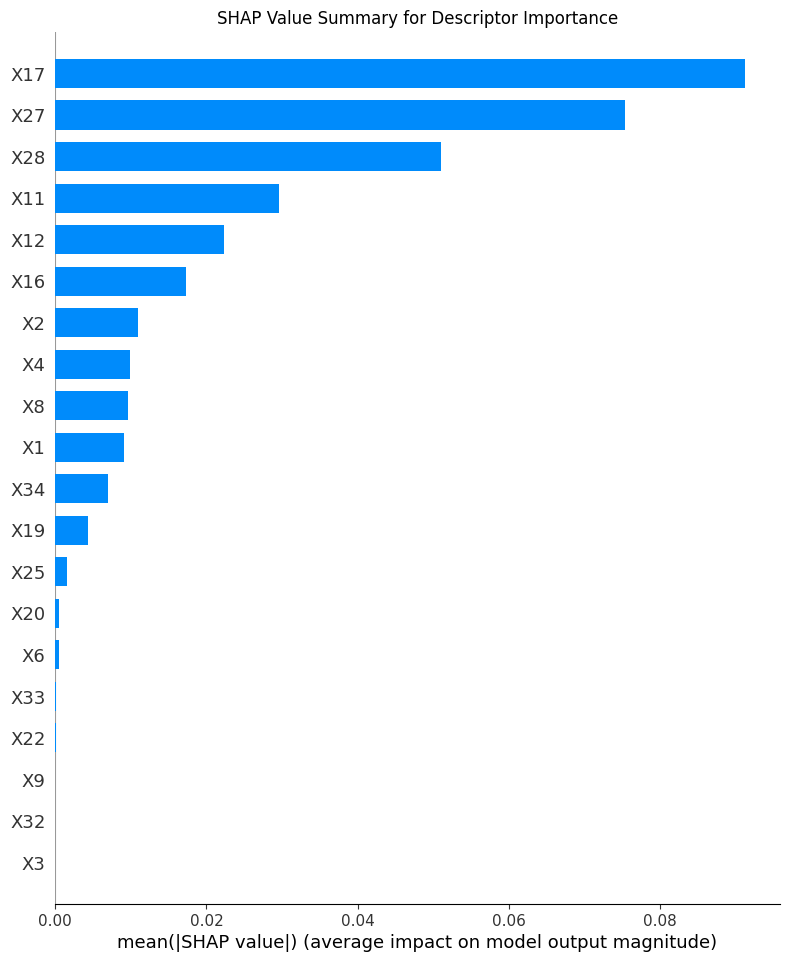

SHAP values saved to 'shap_values.csv'.


<Figure size 1000x800 with 0 Axes>

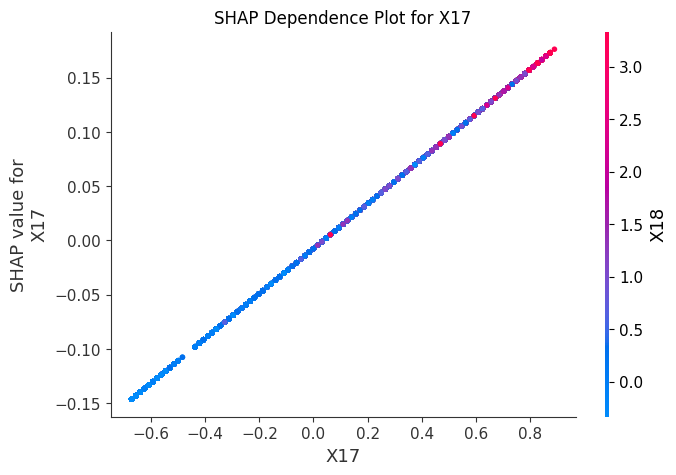

Most Related Descriptors:
 X17    0.102836
X28    0.062852
X11    0.036222
X4     0.015272
X34    0.012603
dtype: float64
Least Related Descriptors:
 X25   -0.001751
X2    -0.017445
X16   -0.022217
X12   -0.027317
X27   -0.098288
dtype: float64
Most and least related descriptors saved to 'most_least_related_descriptors.txt'.


In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Create a directory for saving the plots and tables
output_dir = 'objective_2'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the processed dataset
processed_df = pd.read_csv('processed_data.csv')

# Check if Y_COMP exists, if not, compute it using the same method from Objective 1
if 'Y_COMP' not in processed_df.columns:
    print("Y_COMP not found in dataset, calculating Y_COMP...")
    Z = processed_df[['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']]

    # Standardize the Z_i variables before PCA
    scaler = StandardScaler()
    Z_scaled = scaler.fit_transform(Z)

    # Perform PCA on the Z_i variables
    pca = PCA(n_components=1)
    pca.fit(Z_scaled)

    # Extract the first principal component as the raw weights
    raw_weights = pca.components_[0]

    # Normalize weights to sum to 1
    weights = np.abs(raw_weights)
    weights /= weights.sum()

    # Construct the weighted overall desirability score Y_COMP
    Y_COMP = Z_scaled.dot(weights)

    # Apply min-max normalization to Y_COMP to bring it to the range [0, 1]
    min_max_scaler = MinMaxScaler()
    processed_df['Y_COMP'] = min_max_scaler.fit_transform(Y_COMP.reshape(-1, 1)).flatten()

# Now proceed with the analysis

# Extract the molecular descriptors X and the overall desirability score Y_COMP
X = processed_df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
                  'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                  'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
                  'X31', 'X32', 'X33', 'X34']]

Y_COMP = processed_df['Y_COMP']

# Standardize the molecular descriptors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Elastic Net Regression

# Perform Elastic Net regression with cross-validation to optimize alpha and l1_ratio
elastic_net = ElasticNetCV(cv=5, random_state=0, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_jobs=-1)
elastic_net.fit(X_scaled, Y_COMP)

# Extract the coefficients
coefficients = pd.Series(elastic_net.coef_, index=X.columns)
coefficients_sorted = coefficients.sort_values(ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 8))
coefficients_sorted.plot(kind='barh')
plt.title('Elastic Net Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Descriptors')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'elastic_net_coefficients.png'))
plt.show()

# Save the coefficients to a CSV file
coefficients_sorted.to_csv(os.path.join(output_dir, 'elastic_net_coefficients.csv'))
print("Elastic Net coefficients saved to 'elastic_net_coefficients.csv'.")

# 2. SHAP Values for Descriptor Importance

# Create a SHAP explainer using the trained Elastic Net model
explainer = shap.LinearExplainer(elastic_net, X_scaled, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_scaled)

# Create a summary plot for SHAP values
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title('SHAP Value Summary for Descriptor Importance')
plt.savefig(os.path.join(output_dir, 'shap_summary.png'))
plt.show()

# Save SHAP values to a CSV file
shap_values_df = pd.DataFrame(shap_values, columns=X.columns)
shap_values_df.to_csv(os.path.join(output_dir, 'shap_values.csv'), index=False)
print("SHAP values saved to 'shap_values.csv'.")

# SHAP dependence plot for the most important feature
top_feature = coefficients_sorted.index[0]
plt.figure(figsize=(10, 8))
shap.dependence_plot(top_feature, shap_values, X, show=False)
plt.title(f'SHAP Dependence Plot for {top_feature}')
plt.savefig(os.path.join(output_dir, f'shap_dependence_{top_feature}.png'))
plt.show()

# Print and save the most and least related descriptors based on Elastic Net coefficients
most_related = coefficients_sorted.head()
least_related = coefficients_sorted.tail()

print("Most Related Descriptors:\n", most_related)
print("Least Related Descriptors:\n", least_related)

with open(os.path.join(output_dir, 'most_least_related_descriptors.txt'), 'w') as f:
    f.write("Most Related Descriptors:\n")
    f.write(most_related.to_string())
    f.write("\n\nLeast Related Descriptors:\n")
    f.write(least_related.to_string())

print(f"Most and least related descriptors saved to 'most_least_related_descriptors.txt'.")


Objective 3 Code

Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X31       X32         X33       X34  Z_1  Z_2  Z_3  \
0  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
1  2.278657  ...  1.157993 -2.097747    9.977374 -0.547297    2    2    3   
2  1.691844  ...  1.267658 -1.101381   14.818840  0.246622    2    2    3   
3 -0.366758  ... -0.892193 -1.067224    0.016797 -1.152027    2    2    1   
4  0.802744  ...  0.163569 -1.604288  751.808634 -0.554054    2    1    3   

   Z_4  Z_5  Z_6  
0    4    1    1  
1    

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


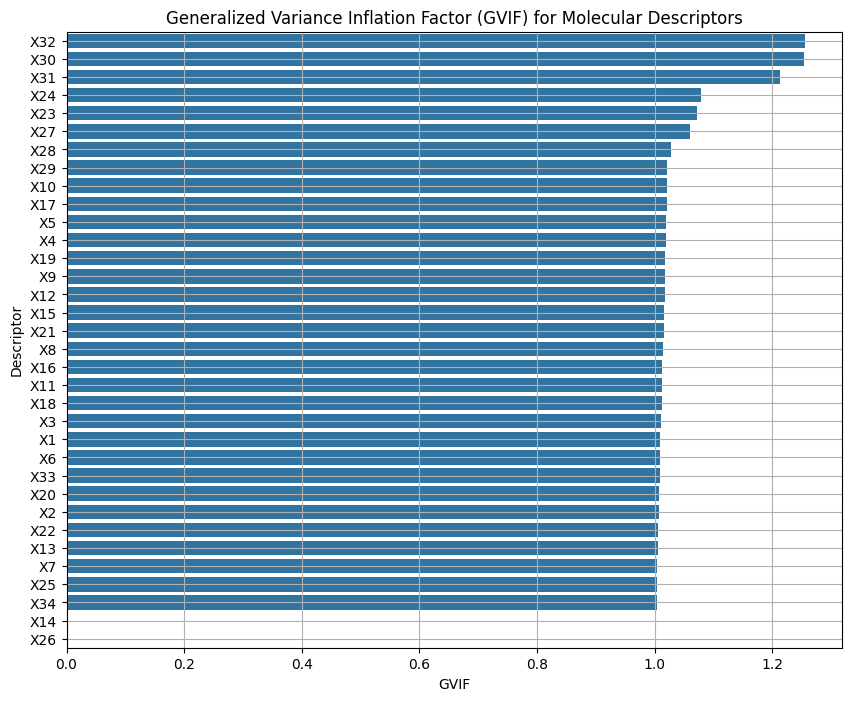

GVIF values saved to 'gvif_values.csv'.


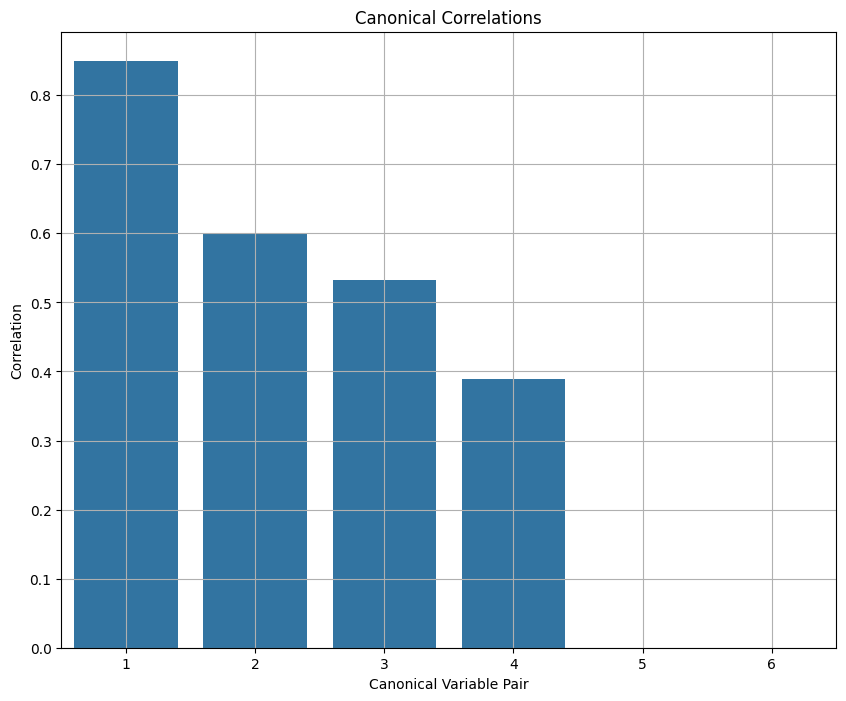

CCA coefficients saved to 'cca_coefficients_X.csv' and 'cca_coefficients_Z.csv'.
Most Redundant Descriptors based on GVIF:
 Empty DataFrame
Columns: [Descriptor, VIF, GVIF]
Index: []
Most redundant descriptors saved to 'redundant_descriptors.csv'.


In [30]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a directory for saving the plots and tables
output_dir = 'objective_3'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the processed dataset
processed_df = pd.read_csv('processed_data.csv')

# Display the first few rows to check if the data is loaded correctly
print("Processed Dataset Head:\n", processed_df.head())

# Extract the molecular descriptors X and the quantile-based desirability indicators Z
X = processed_df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
                  'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                  'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
                  'X31', 'X32', 'X33', 'X34']]
Z = processed_df[['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']]

# Standardize the molecular descriptors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Generalized Variance Inflation Factor (GVIF)

# Add a constant to X for GVIF calculation
X_with_constant = add_constant(X_scaled)

# Calculate VIF for each descriptor
vif_data = pd.DataFrame({
    'Descriptor': X.columns,
    'VIF': [variance_inflation_factor(X_with_constant, i+1) for i in range(len(X.columns))]
})

# Calculate the GVIF for each descriptor
p = len(X.columns)
vif_data['GVIF'] = vif_data['VIF']**(1/(2*p))

# Sort GVIF values and plot
vif_data_sorted = vif_data.sort_values(by='GVIF', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='GVIF', y='Descriptor', data=vif_data_sorted)
plt.title('Generalized Variance Inflation Factor (GVIF) for Molecular Descriptors')
plt.xlabel('GVIF')
plt.ylabel('Descriptor')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'gvif_plot.png'))
plt.show()

# Save the GVIF data to a CSV file
vif_data_sorted.to_csv(os.path.join(output_dir, 'gvif_values.csv'), index=False)
print("GVIF values saved to 'gvif_values.csv'.")

# 2. Canonical Correlation Analysis (CCA)

# Perform CCA
cca = CCA(n_components=min(X.shape[1], Z.shape[1]))
X_c, Z_c = cca.fit_transform(X_scaled, Z)

# Plot the canonical correlations
canonical_correlations = [np.corrcoef(X_c[:, i], Z_c[:, i])[0, 1] for i in range(cca.n_components)]
plt.figure(figsize=(10, 8))
sns.barplot(x=np.arange(1, cca.n_components + 1), y=canonical_correlations)
plt.title('Canonical Correlations')
plt.xlabel('Canonical Variable Pair')
plt.ylabel('Correlation')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'canonical_correlations.png'))
plt.show()

# Create a DataFrame to save CCA coefficients for interpretation
cca_coefficients_X = pd.DataFrame(cca.x_loadings_, index=X.columns, columns=[f'Canonical Loading {i+1}' for i in range(cca.n_components)])
cca_coefficients_Z = pd.DataFrame(cca.y_loadings_, index=Z.columns, columns=[f'Canonical Loading {i+1}' for i in range(cca.n_components)])

# Save the CCA coefficients to a CSV file
cca_coefficients_X.to_csv(os.path.join(output_dir, 'cca_coefficients_X.csv'))
cca_coefficients_Z.to_csv(os.path.join(output_dir, 'cca_coefficients_Z.csv'))
print("CCA coefficients saved to 'cca_coefficients_X.csv' and 'cca_coefficients_Z.csv'.")

# Summary: Save and print the most redundant descriptors based on GVIF
redundant_descriptors = vif_data_sorted[vif_data_sorted['GVIF'] > 10]  # Typically, GVIF > 10 indicates multicollinearity

print("Most Redundant Descriptors based on GVIF:\n", redundant_descriptors)
redundant_descriptors.to_csv(os.path.join(output_dir, 'redundant_descriptors.csv'), index=False)
print(f"Most redundant descriptors saved to 'redundant_descriptors.csv'.")


Objective 4 (Later )

In [ ]:
#Objective 4 Code will be written later

Objective 5

In [32]:
!pip install pygam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 20.4 MB/s eta 0:00:00


In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a directory for saving the plots and tables
output_dir = 'objective_5'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the processed dataset
processed_df = pd.read_csv('processed_data.csv')

# Define the optimal weights derived from the PCA analysis in Objective 1
optimal_weights = np.array([0.24700425, 0.1264904, 0.34778521, 0.27872014, 0.0, 0.0])

# Ensure that the Z columns exist
Z_columns = ['Z_1', 'Z_2', 'Z_3', 'Z_4', 'Z_5', 'Z_6']
if all(col in processed_df.columns for col in Z_columns):
    # Calculate Y_COMP using the optimal weights
    Y_COMP = np.dot(processed_df[Z_columns], optimal_weights)
    # Min-Max normalization of Y_COMP to scale it between 0 and 1
    Y_COMP_scaled = (Y_COMP - Y_COMP.min()) / (Y_COMP.max() - Y_COMP.min())
    processed_df['Y_COMP'] = Y_COMP_scaled

    # Save the updated DataFrame
    processed_df.to_csv('processed_data.csv', index=False)
else:
    raise ValueError("Quantile-based Z columns are missing. Ensure Z_1 to Z_6 are correctly created.")

# Display the first few rows to check if the data is updated correctly
print("Updated Processed Dataset Head:\n", processed_df.head())

# Extract X and Y_COMP for further analysis
X = processed_df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
                  'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                  'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30',
                  'X31', 'X32', 'X33', 'X34']]
Y_COMP = processed_df['Y_COMP']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_COMP, test_size=0.2, random_state=42)

# Proceed with the analysis using Generalized Additive Model (GAM) and Gradient Boosting Machine (GBM)

# Import necessary libraries
from pygam import LinearGAM, s
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# 1. Generalized Additive Model (GAM)
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) +
                s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) +
                s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29) +
                s(30) + s(31) + s(32) + s(33)).gridsearch(X_train.values, Y_train.values)

# Predict and evaluate the GAM model
Y_pred_gam = gam.predict(X_test)
mse_gam = mean_squared_error(Y_test, Y_pred_gam)
mae_gam = mean_absolute_error(Y_test, Y_pred_gam)
evs_gam = explained_variance_score(Y_test, Y_pred_gam)

# Save the GAM plots
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.figure()
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(f'Partial Dependence of Descriptor X{i+1}')
    plt.xlabel(f'Descriptor X{i+1}')
    plt.ylabel('Partial Dependence')
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'gam_partial_dependence_X{i+1}.png'))
    plt.close()

# 2. Gradient Boosting Machine (GBM)
gbm = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search with cross-validation
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)

# Best GBM model
best_gbm = grid_search.best_estimator_

# Predict and evaluate the GBM model
Y_pred_gbm = best_gbm.predict(X_test)
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
mae_gbm = mean_absolute_error(Y_test, Y_pred_gbm)
evs_gbm = explained_variance_score(Y_test, Y_pred_gbm)

# Save the GBM feature importances plot
plt.figure(figsize=(10, 8))
sns.barplot(x=best_gbm.feature_importances_, y=X.columns)
plt.title('Feature Importances from Gradient Boosting Machine')
plt.xlabel('Importance')
plt.ylabel('Descriptor')
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'gbm_feature_importances.png'))
plt.close()

# Save the evaluation metrics to a text file
with open(os.path.join(output_dir, 'evaluation_metrics.txt'), 'w') as f:
    f.write('Evaluation Metrics for GAM and GBM\n')
    f.write('--------------------------------\n')
    f.write(f'GAM MSE: {mse_gam:.4f}\n')
    f.write(f'GAM MAE: {mae_gam:.4f}\n')
    f.write(f'GAM Explained Variance Score: {evs_gam:.4f}\n\n')
    f.write(f'GBM MSE: {mse_gbm:.4f}\n')
    f.write(f'GBM MAE: {mae_gbm:.4f}\n')
    f.write(f'GBM Explained Variance Score: {evs_gbm:.4f}\n')

# Print the evaluation metrics
print(f'GAM MSE: {mse_gam:.4f}')
print(f'GAM MAE: {mae_gam:.4f}')
print(f'GAM Explained Variance Score: {evs_gam:.4f}')
print(f'GBM MSE: {mse_gbm:.4f}')
print(f'GBM MAE: {mae_gbm:.4f}')
print(f'GBM Explained Variance Score: {evs_gbm:.4f}')


Updated Processed Dataset Head:
     Y1        Y2      Y3     Y4      Y5   Y6        X1        X2        X3  \
0  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
1  1.0  1.000000  1.0000  0.545  1.0000  1.0  1.930247 -0.563218  0.408451   
2  1.0  1.000000  1.0000  0.680  1.0000  1.0  1.135802 -0.471264  0.535211   
3  1.0  1.000000  0.0535  0.000  0.5355  1.0 -0.812346 -0.206897 -0.633803   
4  1.0  0.833333  1.0000  1.000  1.0000  1.0  1.198765 -0.931034 -0.380282   

         X4  ...       X32         X33       X34  Z_1  Z_2  Z_3  Z_4  Z_5  \
0  1.691844  ... -1.101381   14.818840  0.246622    2    2    3    4    1   
1  2.278657  ... -2.097747    9.977374 -0.547297    2    2    3    4    1   
2  1.691844  ... -1.101381   14.818840  0.246622    2    2    3    4    1   
3 -0.366758  ... -1.067224    0.016797 -1.152027    2    2    1    1    1   
4  0.802744  ... -1.604288  751.808634 -0.554054    2    1    3    4    1   

   Z_6    Y_COMP  
0    1  1.000000

100% (11 of 11) |########################| Elapsed Time: 0:01:38 Time:  0:01:38


Fitting 5 folds for each of 32 candidates, totalling 160 fits
GAM MSE: 0.0279
GAM MAE: 0.1300
GAM Explained Variance Score: 0.7354
GBM MSE: 0.0145
GBM MAE: 0.0860
GBM Explained Variance Score: 0.8623
